# Figures long range: plots

In [1]:
import pickle 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 120
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
with open('/home/ctabares/variational_long_range-main/paper/residual_energy_long-range_ferro_dict_final_def.p','rb') as fp:
    residual_energies = pickle.load(fp)

with open('/home/ctabares/variational_long_range-main/paper/state_infidelity_long-range_ferro_dict_final_def.p','rb') as fp:
    state_infidelities = pickle.load(fp)

In [3]:
Ns = [8,10,12,14]
layers = [8,10,10,10]
gates = ['global_adiab','global_fixed-alpha_adiab','global_all-to-all_adiab',
            '1st-neigh_adiab',
            'hea-cnot_adiab','hea-cz_adiab',
            'brick-cnot_adiab_finrot','brick-cz_adiab_finrot']


alpha = 0.5

#fig,ax = plt.subplots(len(Ns),1)
#fig.set_size_inches(2.25,2.25*len(Ns))
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
epsilon = 0.01

layers_minimum_dict = {}
for gate in gates:
    minimum_layer_as_N = []
    for i,N in enumerate(Ns):
        array = []
        total_layers = np.arange(1,layers[i]+1)
        for layer in total_layers:
            array.append((float(state_infidelities[f'N={N}'][f'alpha={alpha}']['s=critical'][f'layers={layer}'][gate])))
        for j,element in enumerate(array):
            if element<epsilon:
                minimum_layer_as_N.append(j+1)
                break
            elif j==len(array)-1:
                minimum_layer_as_N.append(None)
            #minimum_layer_as_N.append(None)
        #print(f'N={N}, layers={layer}, gate ={gate}')
    layers_minimum_dict[gate] = minimum_layer_as_N
        
    

In [4]:
layers_minimum_dict

{'global_adiab': [3, 3, 3, 4],
 'global_fixed-alpha_adiab': [3, 3, 4, 4],
 'global_all-to-all_adiab': [3, 3, 3, 3],
 '1st-neigh_adiab': [8, None, None, None],
 'hea-cnot_adiab': [None, None, None, None],
 'hea-cz_adiab': [None, None, None, None],
 'brick-cnot_adiab_finrot': [3, 3, 4, 8],
 'brick-cz_adiab_finrot': [3, 5, 6, 8]}

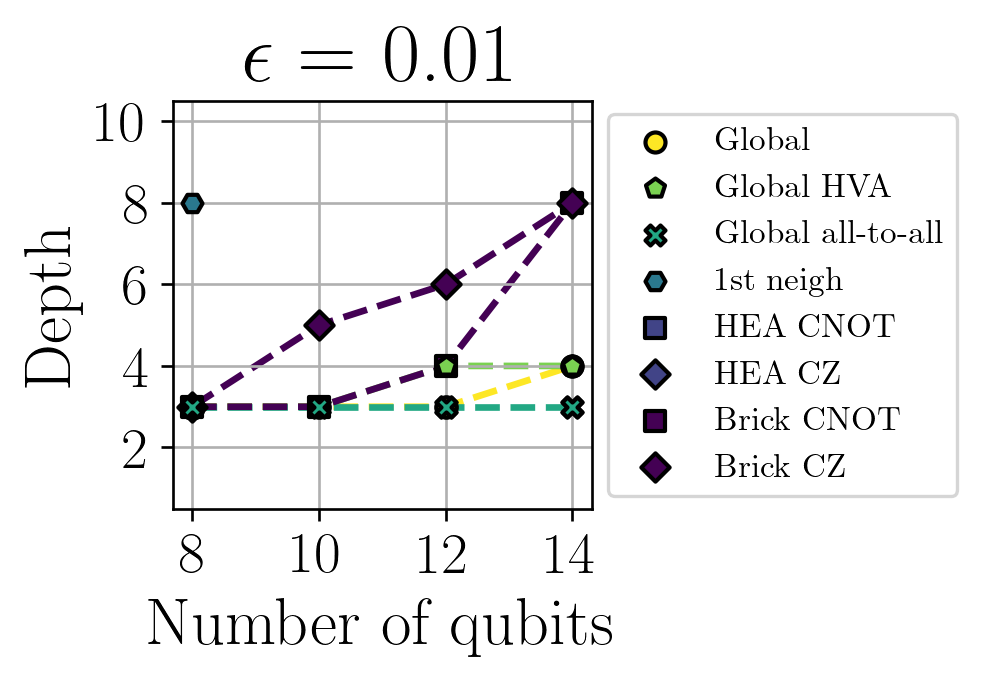

In [5]:

fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
total_qubits = np.arange(8,15,2)

markers = [ 'o',
            'p',
            'X',
            'H',
            's', 'D',
            's', 'D']
            
labels = [ r'Global',
           r'Global HVA',
           r'Global all-to-all',
           r'1st neigh',
           r'HEA CNOT',r'HEA CZ',
           r'Brick CNOT',r'Brick CZ']
gates = [ 'global_adiab',
          'global_fixed-alpha_adiab',
          'global_all-to-all_adiab',
          '1st-neigh_adiab',
          'hea-cnot_adiab','hea-cz_adiab',
          'brick-cnot_adiab_finrot','brick-cz_adiab_finrot']
           
colors2 = [i for j,i in enumerate(colors) if j>1]
colors_plot = ([colors[0]]+[colors[1]]+colors2)[::-1]
colors_pre = [i for j,i in enumerate(colors_plot) if j>3 for _ in (0,1)]
colors_def = colors_plot[0:4]+colors_pre

for gate,marker,label,color in zip(gates,markers,labels,colors_def):
    #if gate[0:3]=='hea' or gate[0]=='1':
        #pass

    ax.scatter(total_qubits,layers_minimum_dict[gate],label=label,linewidth=1.25,marker=marker,
                edgecolor='black',facecolor=color,zorder=10)
    ax.plot(total_qubits,layers_minimum_dict[gate],linewidth=2,color=color,linestyle='dashed',zorder=-1)
    if gate[0:3]=='glo':
        ax.scatter(total_qubits,layers_minimum_dict[gate],linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=120)
        pass


ax.set_xlabel(r'Number of qubits',fontsize=20)
ax.set_ylabel(r"Depth",fontsize=20)
ax.tick_params(axis='both', labelsize=17.5)
state_infidelities
ax.set_title(r'$\epsilon=$ '+str(epsilon),fontsize=25)
ax.set_xticks([8,10,12,14])
ax.set_xticklabels([r'8',r'10',r'12',r'14'])
ax.set_yticks([2,4,6,8,10])
ax.set_yticklabels([r'2',r'4',r'6',r'8',r'10'])
ax.set_ylim([0.5,10.5])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
plt.grid()
#plt.setp(ax, ylim=ax1.get_ylim())[colors[0]]+[colors[1]]


#plt.savefig("figures/figure1/figure1_epsilon={:}.pdf".format(epsilon),bbox_inches='tight',dpi=600)

In [12]:
layers_minimum_dict['brick-cz_adiab_finrot'][-1] = 7

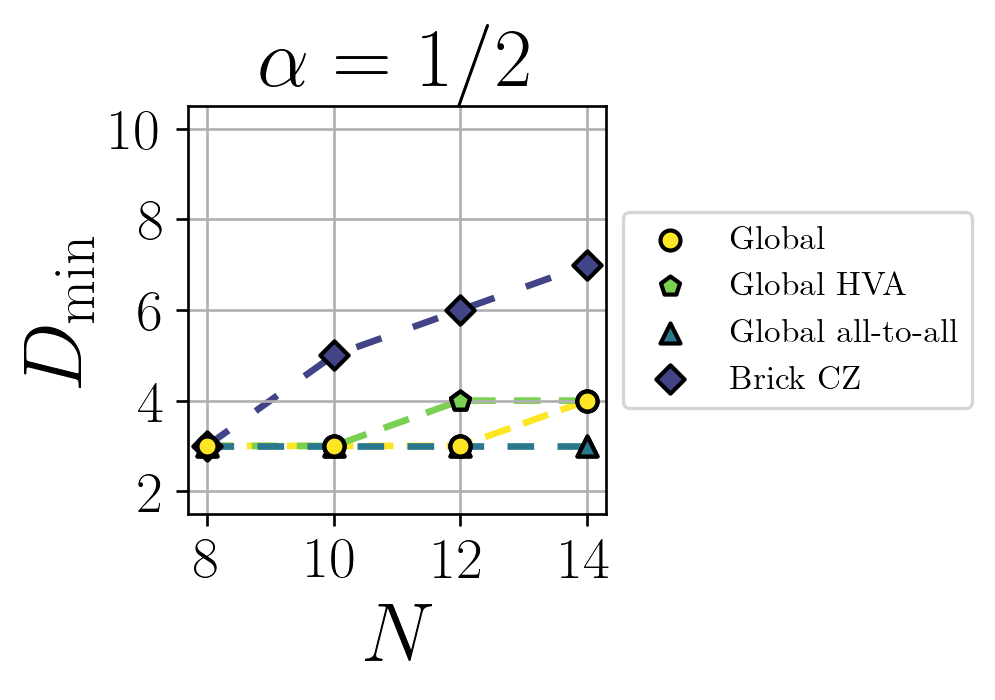

In [14]:
from fractions import Fraction
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
total_qubits = np.arange(8,15,2)

markers = [ 'o',
            'p',
            '^',
            'H',
            'D', 'D']
            
labels = [ r'Global',
           r'Global HVA',
           r'Global all-to-all',
           r'1st neigh',
           r'Brick CZ']

styles = [(0, (4, 2)),
          (0, (4, 2.75)),
          (0, (4, 3.5)),
          (0, (4, 4.25)),
          (0, (4, 5)), (0, (4, 5))]
gates = [ 'global_adiab',
          'global_fixed-alpha_adiab',
          'global_all-to-all_adiab',
          '1st-neigh_adiab',
          'brick-cz_adiab_finrot']
           
colors_def = [colors[-1],colors[-2],colors[-4],colors[-3],colors[1],colors[1]]

for gate,marker,label,color,lines in zip(gates,markers,labels,colors_def,styles):
    if gate[0:3]=='1st' or gate=='globael_all-to-all_adiab':
        pass
    else:
        ax.scatter(total_qubits,layers_minimum_dict[gate],label=label,linewidth=1.25,marker=marker,
                    edgecolor='black',facecolor=color,zorder=10)
        ax.plot(total_qubits,layers_minimum_dict[gate],linewidth=2,color=color,linestyle=lines,zorder=-1,alpha=1)
        if gate[0:6]=='global':
            ax.scatter(total_qubits,layers_minimum_dict[gate],linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=100)
            pass
        if gate=='global_adiab':
            ax.scatter(total_qubits,layers_minimum_dict[gate],linewidth=1.25,marker=marker,edgecolor='black', facecolor=color,zorder=120)
            pass


ax.set_xlabel(r'$N$',fontsize=25)
ax.set_ylabel(r"$D_{\mathrm{min}}$",fontsize=25)
ax.tick_params(axis='both', labelsize=17.5)
state_infidelities
ax.set_title(r'$\alpha={:}$ '.format(Fraction(alpha)),fontsize=25)
ax.set_xticks([8,10,12,14])
ax.set_xticklabels([r'8',r'10',r'12',r'14'])
ax.set_yticks([2,4,6,8,10])
ax.set_yticklabels([r'2',r'4',r'6',r'8',r'10'])
ax.set_ylim([1.5,10.5])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
plt.grid()
#plt.setp(ax, ylim=ax1.get_ylim())[colors[0]]+[colors[1]]


plt.savefig("figures/figure_long_range_ferro/depth_with_N_alpha={:}_epsilon={:}_def.pdf".format(alpha,epsilon),bbox_inches='tight',dpi=600)

In [104]:
gates

['global_adiab',
 'global_fixed-alpha_adiab',
 'global_all-to-all_adiab',
 '1st-neigh_adiab',
 'brick-cz_adiab_finrot']

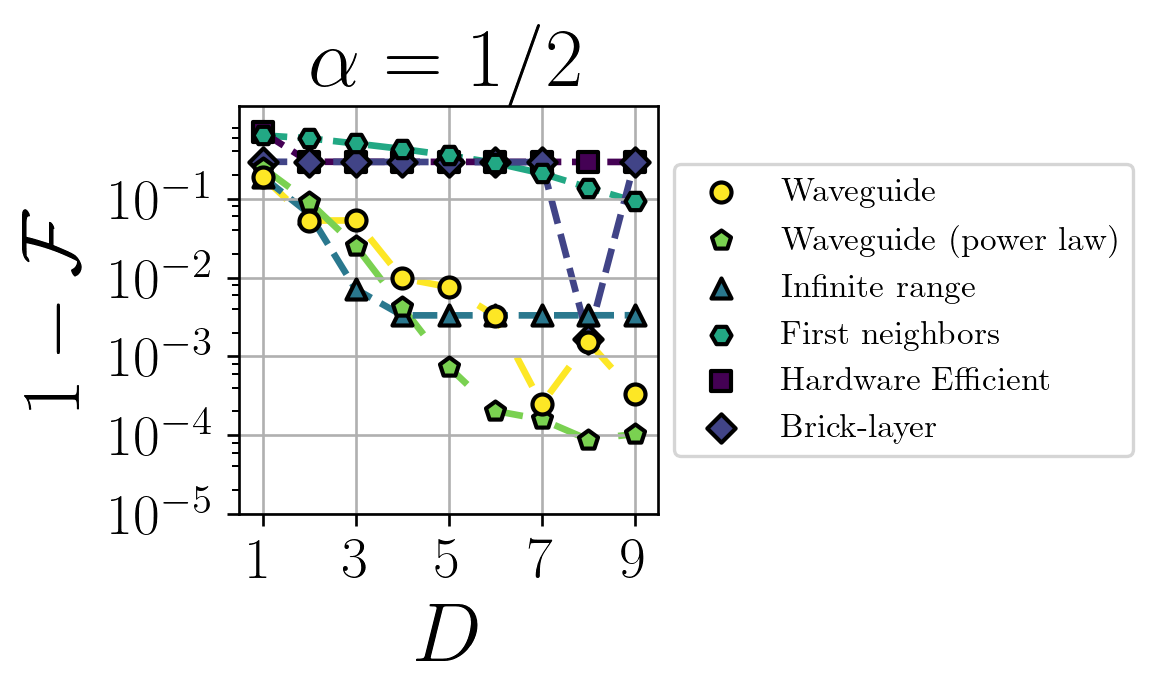

In [7]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
total_layers = np.arange(1,11)
'''
ax.plot(xi_list[0:m],fidelity_hva,label=r'HVA',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cnot,label=r'CNOT gates',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cz,label=r'CZ gates',linewidth=2)
'''
'''
ax.scatter(total_layers,final_energy_hva,label=r'HVA',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1])
ax.plot(total_layers,final_energy_hva,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cnot,label=r'CNOT',linewidth=1.25,marker='d',edgecolor='black', facecolor=colors[0])
ax.plot(total_layers,final_energy_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cz,label=r'CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1])
ax.plot(total_layers,final_energy_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.scatter(total_layers[-1],final_energy_hva[-1],linewidth=1.25,marker='o',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cnot[-1],linewidth=1.25,marker='d',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cz[-1],linewidth=1.25,marker='D',edgecolor='black', facecolor='white',alpha=0.65)
'''
final_state_global = []
final_state_global_fixed = []
final_state_global_all_to_all = []
final_state_hva = []
final_state_hea_cnot = []
final_state_hea_cz = []
final_state_brick_cnot = []
final_state_brick_cz = []
for layer in total_layers:
    final_state_global.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['global_adiab'])
    final_state_global_fixed.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['global_fixed-alpha_adiab'])
    final_state_global_all_to_all.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['global_all-to-all_adiab'])
    final_state_hva.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['1st-neigh_adiab'])
    final_state_hea_cnot.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['hea-cnot_adiab'])
    final_state_hea_cz.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['hea-cz_adiab'])
    final_state_brick_cnot.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['brick-cnot_adiab_finrot'])
    final_state_brick_cz.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['brick-cz_adiab_finrot'])

plt.grid()
ax.scatter(total_layers[0:-1],final_state_global[0:-1],label=r'Waveguide',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1],zorder=15)
ax.plot(total_layers[0:-1],final_state_global[0:-1],linewidth=2,color=colors[-1],linestyle=(0, (5, 5)),zorder=-1)
ax.scatter(total_layers[0:-1],final_state_global_fixed[0:-1],label=r'Waveguide (power law)',linewidth=1.25,marker='p',edgecolor='black', facecolor=colors[-2],zorder=14)
ax.plot(total_layers[0:-1],final_state_global_fixed[0:-1],linewidth=2,color=colors[-2],linestyle=(0, (5, 5)),zorder=-1)
ax.scatter(total_layers[0:-1],final_state_global_all_to_all[0:-1],label=r'Infinite range',linewidth=1.25,marker='^',edgecolor='black', facecolor=colors[-4],zorder=10)
ax.plot(total_layers[0:-1],final_state_global_all_to_all[0:-1],linewidth=2,color=colors[-4],linestyle='dashed',zorder=-1)
ax.scatter(total_layers[0:-1],final_state_hva[0:-1],label=r'First neighbors',linewidth=1.25,marker='H',edgecolor='black', facecolor=colors[-3],zorder=10)
ax.plot(total_layers[0:-1],final_state_hva[0:-1],linewidth=2,color=colors[-3],linestyle='dashed',zorder=-1)
#ax.scatter(total_layers,final_state_hea_cnot,label=r'HEA CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
#ax.plot(total_layers,final_state_hea_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers[0:-1],final_state_hea_cz[0:-1],label=r'Hardware Efficient',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers[0:-1],final_state_hea_cz[0:-1],linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
#ax.scatter(total_layers,final_state_brick_cnot,label=r'Brick CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[1],zorder=2)
#ax.plot(total_layers,final_state_brick_cnot,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers[0:-1],final_state_brick_cz[0:-1],label=r'Brick-layer',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers[0:-1],final_state_brick_cz[0:-1],linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.set_yscale('log')



#ax.set_xlim([3.2,0.2])
ax.set_title(r'$\alpha={:}$ '.format(Fraction(alpha)),fontsize=25)
ax.set_xlabel(r'$D$',fontsize=25)
ax.set_ylabel(r"$1-\mathcal{F}$",fontsize=25)
ax.tick_params(axis='both', labelsize=17.5)
#restore_minor_ticks_log_plot(ax)
from matplotlib import ticker as mticker
ax.yaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs=(.2, .4, .6, .8)))
ax.set_yticks([1e-1,1e-2,1e-3,1e-4,1e-5])
ax.set_yticklabels([r'$10^{-1}$',r'$10^{-2}$',r'$10^{-3}$',r'$10^{-4}$',r'$10^{-5}$'])
ax.set_xticks([1,3,5,7,9])
ax.set_xticklabels([r'$1$',r'$3$',r'$5$',r'$7$',r'$9$'])
ax.set_xlim([0.5,9+0.5])
ax.set_ylim([1e-5,1.5])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
#plt.setp(ax, ylim=ax1.get_ylim())

#plt.savefig("figures/figure_long_range_ferro/def_final_state_infidelity_N={:}_alpha={:}_nolayer.pdf".format(N,alpha),bbox_inches='tight',dpi=600)

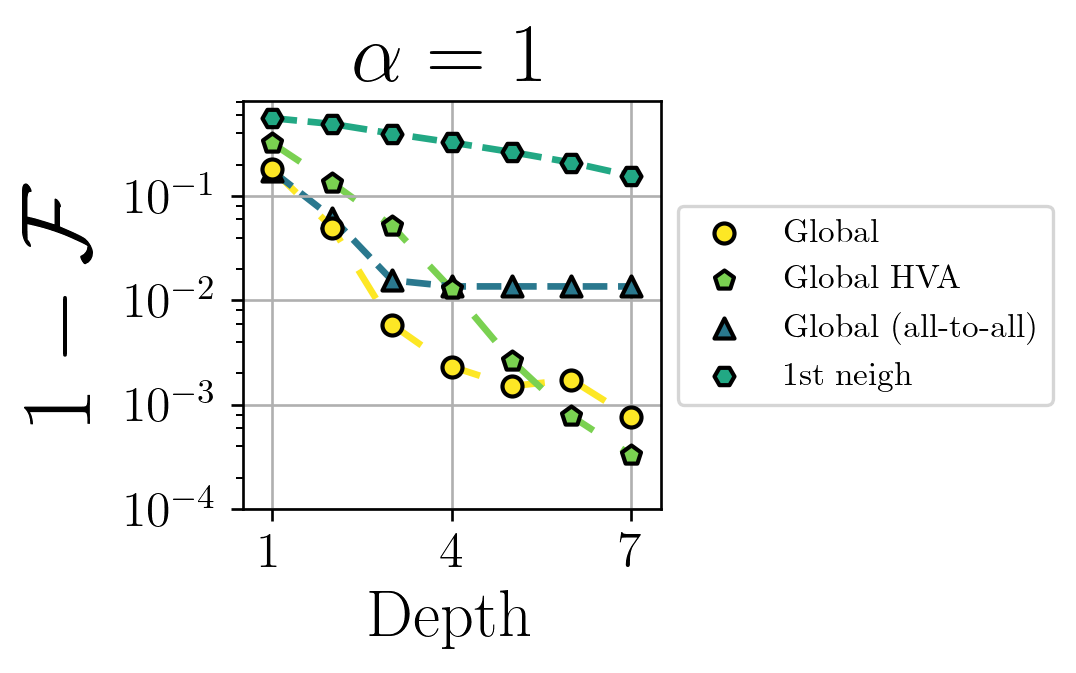

In [141]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
total_layers = np.arange(1,int(N/2)+1)
'''
ax.plot(xi_list[0:m],fidelity_hva,label=r'HVA',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cnot,label=r'CNOT gates',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cz,label=r'CZ gates',linewidth=2)
'''
'''
ax.scatter(total_layers,final_energy_hva,label=r'HVA',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1])
ax.plot(total_layers,final_energy_hva,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cnot,label=r'CNOT',linewidth=1.25,marker='d',edgecolor='black', facecolor=colors[0])
ax.plot(total_layers,final_energy_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cz,label=r'CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1])
ax.plot(total_layers,final_energy_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.scatter(total_layers[-1],final_energy_hva[-1],linewidth=1.25,marker='o',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cnot[-1],linewidth=1.25,marker='d',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cz[-1],linewidth=1.25,marker='D',edgecolor='black', facecolor='white',alpha=0.65)
'''
final_state_global = []
final_state_global_fixed = []
final_state_global_all_to_all = []
final_state_hva = []
final_state_hea_cnot = []
final_state_hea_cz = []
final_state_brick_cnot = []
final_state_brick_cz = []
for layer in total_layers:
    final_state_global.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['global_adiab'])
    final_state_global_fixed.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['global_fixed-alpha_adiab'])
    final_state_global_all_to_all.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['global_all-to-all_adiab'])
    final_state_hva.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['1st-neigh_adiab'])
    final_state_hea_cnot.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['hea-cnot_adiab'])
    final_state_hea_cz.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['hea-cz_adiab'])
    final_state_brick_cnot.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['brick-cnot_adiab_finrot'])
    final_state_brick_cz.append(state_infidelities['N=14'][f'alpha={alpha}']['s=critical'][f'layers={layer}']['brick-cz_adiab_finrot'])

plt.grid()
ax.scatter(total_layers,final_state_global,label=r'Global',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1],zorder=15)
ax.plot(total_layers,final_state_global,linewidth=2,color=colors[-1],linestyle=(0, (5, 5)),zorder=-1)
ax.scatter(total_layers,final_state_global_fixed,label=r'Global HVA',linewidth=1.25,marker='p',edgecolor='black', facecolor=colors[-2],zorder=14)
ax.plot(total_layers,final_state_global_fixed,linewidth=2,color=colors[-2],linestyle=(0, (5, 5)),zorder=-1)
ax.scatter(total_layers,final_state_global_all_to_all,label=r'Global (all-to-all)',linewidth=1.25,marker='^',edgecolor='black', facecolor=colors[-4],zorder=10)
ax.plot(total_layers,final_state_global_all_to_all,linewidth=2,color=colors[-4],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_hva,label=r'1st neigh',linewidth=1.25,marker='H',edgecolor='black', facecolor=colors[-3],zorder=10)
ax.plot(total_layers,final_state_hva,linewidth=2,color=colors[-3],linestyle='dashed',zorder=-1)
'''
ax.scatter(total_layers,final_state_hea_cnot,label=r'HEA CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers,final_state_hea_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_hea_cz,label=r'HEA CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers,final_state_hea_cz,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_brick_cnot,label=r'Brick CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers,final_state_brick_cnot,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_brick_cz,label=r'Brick CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers,final_state_brick_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
'''
ax.set_yscale('log')



#ax.set_xlim([3.2,0.2])
ax.set_title(r'$\alpha=1$ ',fontsize=25)
ax.set_xlabel(r'Depth',fontsize=20)
ax.set_ylabel(r"$1-\mathcal{F}$",fontsize=30)
ax.tick_params(axis='both', labelsize=15)
#restore_minor_ticks_log_plot(ax)
from matplotlib import ticker as mticker
ax.yaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs=(.2, .4, .6, .8)))
ax.set_yticks([1e-1,1e-2,1e-3,1e-4])
ax.set_yticklabels([r'$10^{-1}$',r'$10^{-2}$',r'$10^{-3}$',r'$10^{-4}$'])
ax.set_xticks([1,4,7,10])
ax.set_xticklabels([r'$1$',r'$4$',r'$7$',r'$10$'])
ax.set_xlim([0.5,N/2+0.5])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
#plt.setp(ax, ylim=ax1.get_ylim())

plt.savefig("figures/figure1/only_globals_final_state_infidelity_N={:}_alpha={:}.pdf".format(N,alpha),bbox_inches='tight',dpi=600)